## Data understanding


The project uses King County house sales found in the data folder as `kc_house_data.csv` to show data of home owners who jave listed their homes for sale. The `column_names.md` file in the data folder describes the columns used in the data for better understanding.
The original dataset includes sales data for 21,597 homes with 20 different features, which include:

`date` -Date house was sold
<br>
`price `- Sale price (prediction target
<br>
`bedrooms` - Number of bedrooms
<br>
`bathrooms` - Number of bathrooms
<br>
`sqft_living` - Square footage of living space in the home
<br>
`sqft_lot` - Square footage of the lot
<br>
`floors` - Number of floors (levels) in house
<br>
`waterfront` - Whether the house is on a waterfront
<br>
`view` - Number of times house has been viewed
<br>
`condition` - How good the overall condition of the house is. Related to maintenance of house
<br>
`grade` - Overall grade of the house. Related to the construction and design of the house
<br>
`sqft_above` - Square footage of house apart from basement
<br>
`sqft_basement` - Square footage of the basement
<br>
`yr_built` - Year when house was built
<br>
`yr_renovated` - Year when house was renovated
<br>
`zipcode` - ZIP Code used by the United States Postal Service

## Business Problem

The King county real estate agency helps homeowners buy and/or sell homes.
<br>
 A stakeholder is would like to advice homeowners on how to increase the value of their homes.
 <br>
The business question is how renovations might increase the value of their homes and by what amount? 

## Data preparation 

The data  is found in the file `kc_house_data.csv` which shows data about the houses being sold and bought. It has columns which can be better described in `column_names.md` in the same folder as the data set, i.e data folder.

### 1. Load Data to Dataframe

In [2]:
#Import the required libraries required for the project
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [3]:
#load data 
df = pd.read_csv("/home/mungai/Documents/phase 2/Phase-2-project/data/kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


### 2.Data Cleaning and pre-processing

#### 2.1 Handling missing values

Here we prep the data to ensure is ready for analysis. We will check the data for null values and determine how to handle the null values in the data set.

In [4]:
#check for the information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
#view  all the columns
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Check for columns which have null values. In this part we will be using the `sklearn.impute.missing indicator` to ensure that `NaN` is not representing a category on its own.

In [6]:
#check for null values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
#check the distribution of the data in the column
df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

The `waterfront` column has values are representing 'houses with a view of a waterfront'. Most houses in that column do not have a waterfront which is reprsented with `0` and those with a waterfront are represented by `1` therefore we replace the the null values with 0

In [8]:
#Replace the null values in the waterfront column with 0
df['waterfront'] = df["waterfront"].fillna(0)
#check for the remaining null columns
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In the `yr_renovated` column  which represents " the year the house was renovated ". We check the missing values and the data represented in that column and check and ensure that `NaN` is not a category to represent something else.

In [9]:
#Check values in the year renovated
df["yr_renovated"].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

From the data we get that most houses with `0` have never been renovated before. We fill the Nan values with `0` since this column is relevant to answer the business question

In [10]:
#replace the null values with 0
df['yr_renovated'] = df['yr_renovated'].fillna(0)
#check for the remaining null values in the dataset
df.isna().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view             63
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [11]:
# check for the values in the view column
df['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

The column represents the number of times the house has been viewed. Most of the houses have not been viewed in this dataset. It is proper to assume that the null values are where the houses have not been viewed

In [12]:
#replace the null values with 0
df['view'] = df['view'].fillna(0)
#check for any null values in the dataset
df.isna().sum()


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In the sqft_basement there is a `?` in the column. Sinxe there is not representation of the symbol we replace the value with 0

In [187]:
#Replace a single value with a new value for an individual DataFrame column
df["sqft_basement"] = df["sqft_basement"].replace(['?'],'0.0')
df['sqft_basement'].value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [188]:
#converting the sqft_basment column from str to float
df["sqft_basement"] = df["sqft_basement"].astype("float")

It is ensured that all the missing values have been handled. We head to the exploratory data analysis 

### 3.Data analysis

In this part we will process the data by first checking the data for categorical variables in the columns needed. We will list the data needed to answer the business question then and drop the columns not needed

#### 3.1. Exploratory Data analysis

To determine how home renovations might increase the estimated value of a home, we will need a few columns to work with which will include:
<br>
1.`price`
<br>
2.`year renovated`
<br>
3.`condition`
<br>
4.`grade`
<br>
5. `year built`
<br>
6.`size of the house(number of bedrooms,number of bathrooms,house size in square_feet, lot size in square_feet)`

In [15]:
#list relevant columns needed in the data
col_needed = ['price','yr_renovated','condition','bathrooms','grade','sqft_living','sqft_lot','floors','']

Check for duplicates in data set

In [16]:
#check for duplicates
duplicatedRows = df[df.duplicated()]
duplicatedRows

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [17]:
#We get to see the data set values
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,1788.596842,285.716581,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,827.759761,439.819830,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [18]:
#Explore theh data set on prices of the houses
df['price'].value_counts()

350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64

##### Display the location of the house in a map

In [19]:
#plot the map
fig = px.scatter_geo(df,lat=df['lat'],lon=df['long'], hover_name="price")
fig.update_layout(title = 'Kingcounty house sales, 2014-2015', title_x=0.5)
fig.show()


In [20]:
#Arrange the data set according to the highest prices
df.sort_values('bedrooms', ascending= False)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700
8748,1773100755,8/21/2014,520000.0,11,3.00,3000,4960,2.0,0.0,0.0,...,7,2400,600.0,1918,1999.0,98106,47.5560,-122.363,1420,4960
13301,627300145,8/14/2014,1150000.0,10,5.25,4590,10920,1.0,0.0,2.0,...,9,2500,2090.0,2008,0.0,98004,47.5861,-122.113,2730,10400
19239,8812401450,12/29/2014,660000.0,10,3.00,2920,3745,2.0,0.0,0.0,...,7,1860,1060.0,1913,0.0,98105,47.6635,-122.320,1810,3745
15147,5566100170,10/29/2014,650000.0,10,2.00,3610,11914,2.0,0.0,0.0,...,7,3010,600.0,1958,0.0,98006,47.5705,-122.175,2040,11914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12472,1172000150,8/29/2014,238000.0,1,1.00,530,6350,1.0,0.0,0.0,...,5,530,0.0,1941,0.0,98103,47.6946,-122.357,1200,6350
13316,4356200120,10/23/2014,248000.0,1,1.00,790,12000,1.0,0.0,0.0,...,6,790,0.0,1918,0.0,98118,47.5146,-122.265,1900,6000
7010,203100460,9/24/2014,400000.0,1,1.00,530,13679,1.0,0.0,0.0,...,6,530,0.0,1949,0.0,98053,47.6422,-121.954,1930,20624
3578,1925069006,12/3/2014,355000.0,1,0.75,530,33278,1.0,0.0,2.0,...,4,530,0.0,1950,0.0,98074,47.6412,-122.079,2830,14311


#### Univariate analysis

We will use our main y variable which is `price`

In [21]:
#statistical summary of price
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

The Average house is sold at `540000$`

##### With the way the "date" column is set up, we can divide it into Year and Month to check for any correlation with our Target. First we have to change the data type to date-time.

In [22]:
#change the data type
df['date'] = pd.to_datetime(df['date'])

In [23]:
#Divide the column into year and month
df['year_sold']= df['date'].apply(lambda x : x.year)
df['month_sold']= df['date'].apply(lambda x : x.month)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,2014,5
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,2015,2
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,2014,6
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,...,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,2015,1


In [24]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

To see the distribution of the prices in the data, we will plot a histogram which will show where most of the data is

In [191]:
# assign categorical variables to a variable called categorical_feature
numerical = [df['price'], df['sqft_living'], df['sqft_lot'], df['sqft_above'],df['sqft_basement']]
categorical = [ df['view'], df['floors'], df['grade'],df['condition']]
categorical_bi = [ df['view'], df['floors'], df['grade'],df['condition']]
continuous = [df['sqft_living'], df['sqft_lot'], df['sqft_above']]
timeseries = [df['yr_built'],df['month_sold'],df['year_sold']]
all_columns = [df['bedrooms'],df['bathrooms'],df['sqft_living'],df['sqft_lot'],df['floors'],df['waterfront'],df['view'],df['condition'],df['sqft_above'],df['grade'],df['sqft_basement'],df['sqft_living15'],df['sqft_lot15'],df['price']]

In [180]:
def plot(list):
    enumerate(list)
    sns.set_style('darkgrid')
    plt.figure(figsize=(16,14))
    if list == numerical:
        for i in enumerate(list):
            plt.subplot(2,3,i[0]+1)
            sns.distplot(i[1])
            plt.axvline(x=i[1].mean(), color='red', label='mean')
            plt.legend()
    elif list == categorical_bi:
        for i in enumerate(list):
            plt.subplot(2,3,i[0]+1)
            sns.barplot(x=i[1],y=df['price'])
    elif list == categorical:
        for i in enumerate(list):
            plt.subplot(2,3,i[0]+1)
            sns.countplot(i[1])
    elif list == continuous:
        for i in enumerate(list):
            plt.subplot(2,3,i[0]+1)
            sns.scatterplot(i[1],df['price'], color='darkorange')
    elif list == timeseries:
        for i in enumerate(list):
            plt.subplot(2,3,i[0]+1)
            sns.lineplot(i[1],df['price'])
    elif list == all_columns:
        for i in enumerate(all_columns):
            plt.subplot(4,4,i[0]+1)
            sns.boxplot(i[1],color='darkorange')
    

#### Boxplot to show variables and their outliers

<Figure size 1152x1008 with 0 Axes>

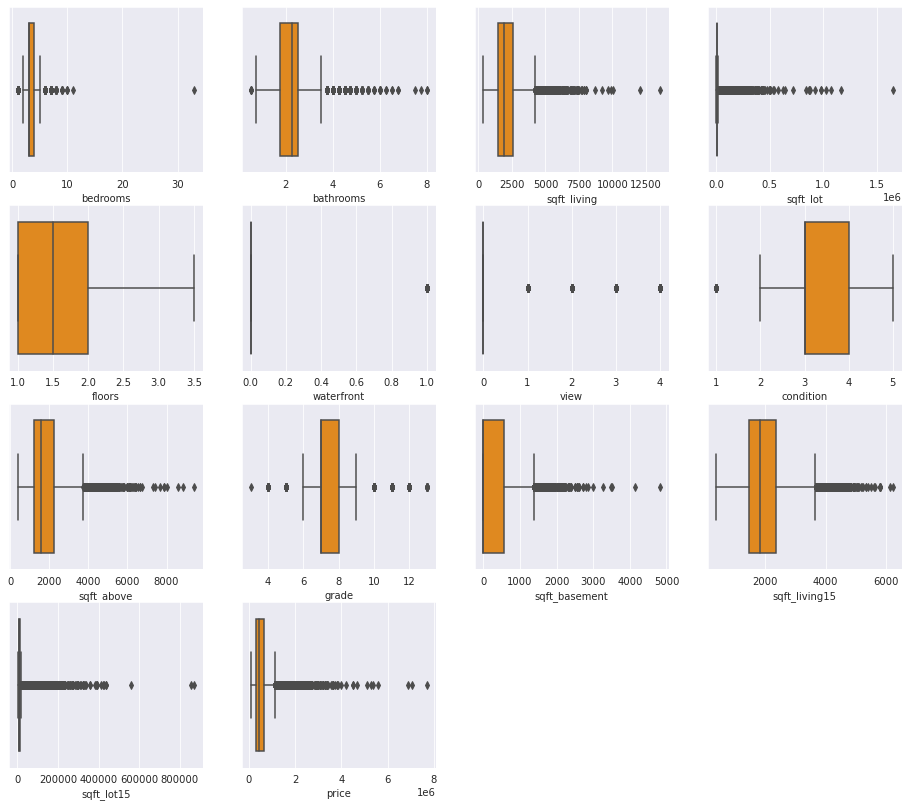

In [164]:
# a boxplot to show the outliers  
plt.figure(figsize = (16,14))
plot(all_columns)

#### Distribution of numerical data 

<Figure size 1152x1008 with 0 Axes>

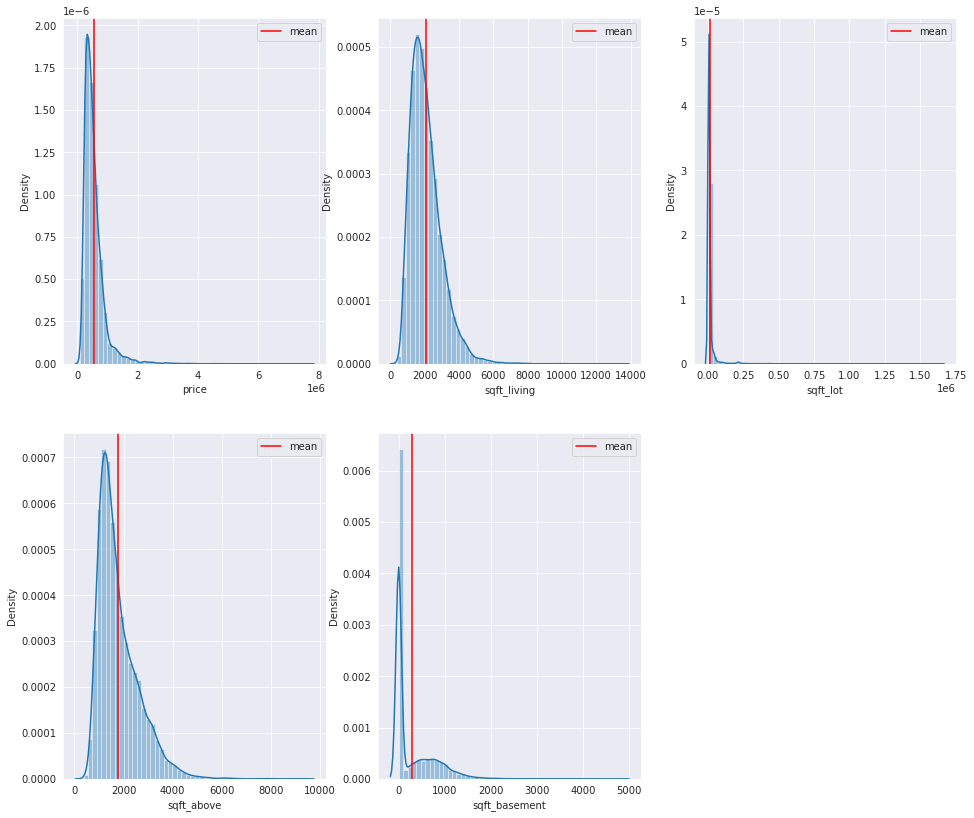

In [169]:
# A plot to show the distribution of numerical data
plt.figure(figsize = (16,14))
plot(numerical)

The data shows that most of the houses cost around 50k and 1 million dollars and few houses cost above 1 million. To find what percentages cover what area we can plot a graph to display the data.
The sale prices can be seen to be skewed more to the right therefore it is better to normalize the curve so as to have a normal distribution of the data.

#### Histograms of categorical variables 

<Figure size 1152x1008 with 0 Axes>

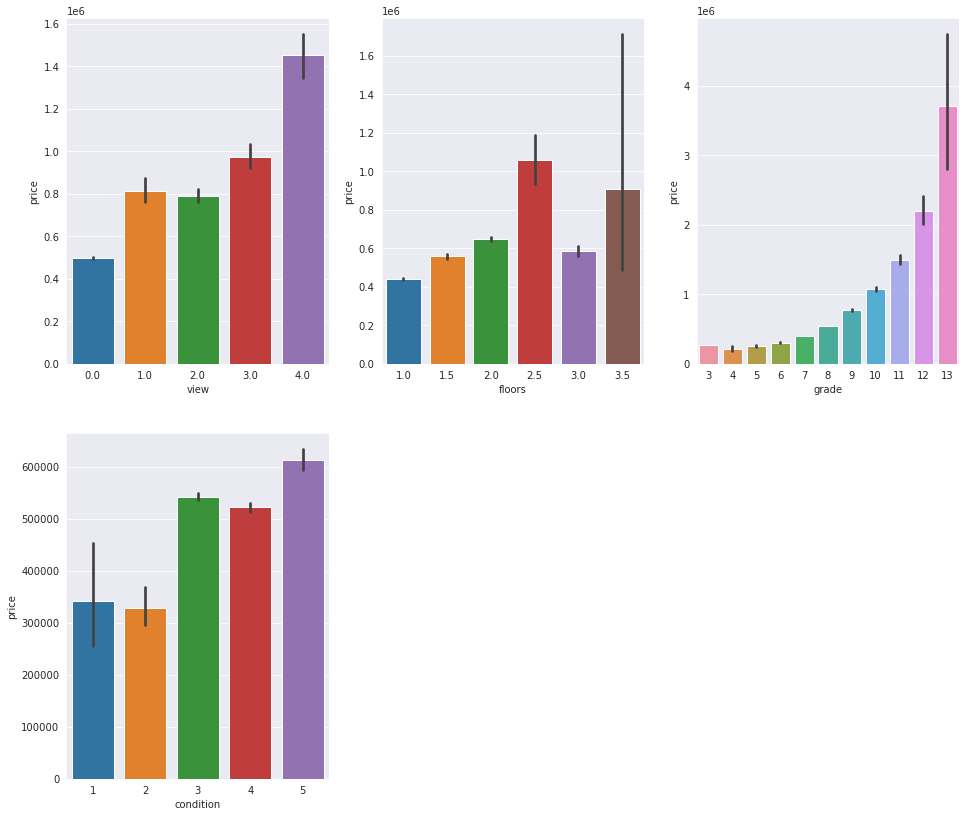

In [181]:
# plot the count of all categorical variable
plt.figure(figsize = (16,14))
plot(categorical)

The condition of the houses are done using the [kc_county_data](https://kingcounty.gov/depts/assessor/Reports/area-reports/2016/~/media/depts/Assessor/documents/AreaReports/2016/Residential/034.ashx) on page 6 of the document.<br>
The condition of the houses are as follows:<br>
`1` = Poor Many repairs needed. Showing serious deterioration.<br>
`2` = Fair Some repairs needed immediately. Much deferred maintenance.<br>
`3` = Average Depending upon age of improvement; normal amount of upkeep for the age
of the home.<br>
`4` = Good Condition above the norm for the age of the home. Indicates extra attention
and care has been taken to maintain.<br>
`5` = Very Good Excellent maintenance and updating on home. Not a total renovation.<br>

<AxesSubplot:xlabel='condition', ylabel='count'>

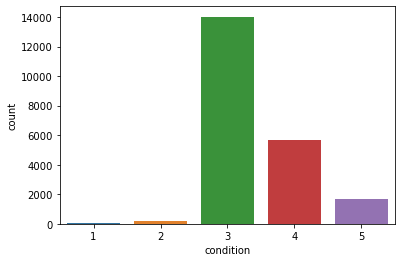

In [ ]:
# count plot of the conditions of the house
sns.countplot(df['condition'])

It is noted that most of the houses have an average condition, followed by a good condition. This shows before listing, houses are kept under a well condition.

The grade of the houses are done using the [kc_county_data](https://kingcounty.gov/depts/assessor/Reports/area-reports/2016/~/media/depts/Assessor/documents/AreaReports/2016/Residential/034.ashx) on page 6 of the document.<br>
The grade of the houses are as follows:<br>

`Grades 1` - 3 Falls short of minimum building standards. Normally cabin or inferior structure.<br>
`Grade 4` - Generally older low quality construction. Does not meet code.<br>
`Grade 5` - Lower construction costs and workmanship. Small, simple design.<br>
`Grade 6`  -Lowest grade currently meeting building codes. Low quality materials, simple designs.<br>
`Grade 7`  -Average grade of construction and design. Commonly seen in plats and older subdivisions.<br>
`Grade 8`  -Just above average in construction and design. Usually better materials in both the exterior and   interior finishes.<br>
`Grade 9` -Better architectural design, with extra exterior and interior design and quality.<br>
`Grade 10` -Homes of this quality generally have high quality features. Finish work is better,
           and more design quality is seen in the floor plans and larger square footage.<br>
`Grade 11` -Custom design and higher quality finish work, with added amenities of solid
           woods, bathroom fixtures and more luxurious options.<br>
`Grade 12` -Custom design and excellent builders. All materials are of the highest quality
           and all conveniences are present.<br>
`Grade 13` -Generally custom designed and built. Approaching the Mansion level. Large
            amount of highest quality cabinet work, wood trim and marble; large entries.<br>

<AxesSubplot:xlabel='grade', ylabel='count'>

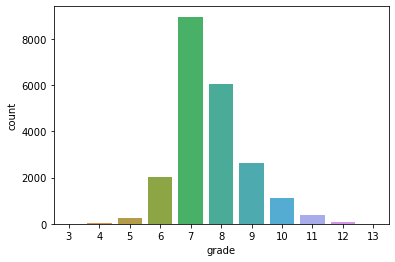

In [ ]:
#View the plot of grades of the houses
sns.countplot(df['grade'])

It is noted that most houses have am average grade. Most of the grading is centered at the average grade.

### Bivariate analysis

#### Multicolinearlity

First we find the correlation between price and all the other columns.
<br>
Multicollinearity is the occurrence of high intercorrelations among two or more independent variables in a multiple regression model. Multicollinearity can lead to skewed or misleading results when a researcher or analyst attempts to determine how well each independent variable can be used most effectively to predict or understand the dependent variable in a statistical model.

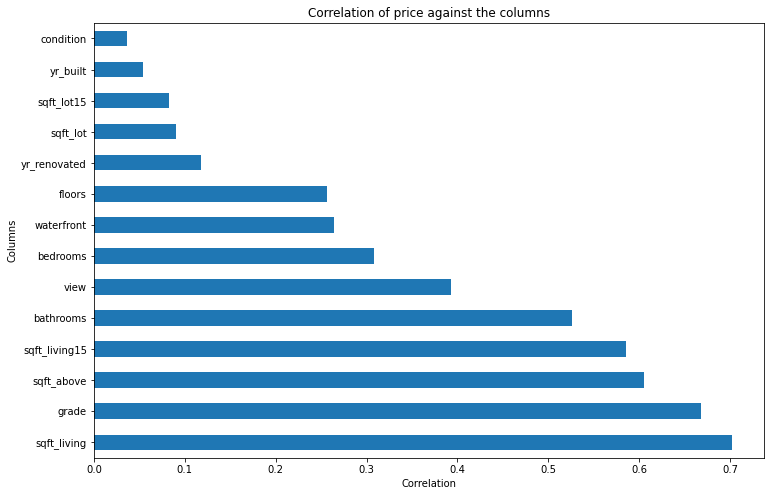

In [ ]:
# Find the correlation using pearson's correlation 
plt.figure(figsize = (12,8))
#plot the distribution
df.corr()['price'].abs().sort_values(ascending=False).drop(['price','id','lat','long','zipcode']).plot(kind='barh')
# set labels
plt.xlabel("Correlation")
plt.ylabel("Columns")
plt.title("Correlation of price against the columns")
plt.show()

##### As seen in the graph, the column with the highest correlation is sqft_living. We can plot a scatter plot to show how they relate to each other.

#### Scatterplot to show relation between price and continuous data


<Figure size 1152x1008 with 0 Axes>

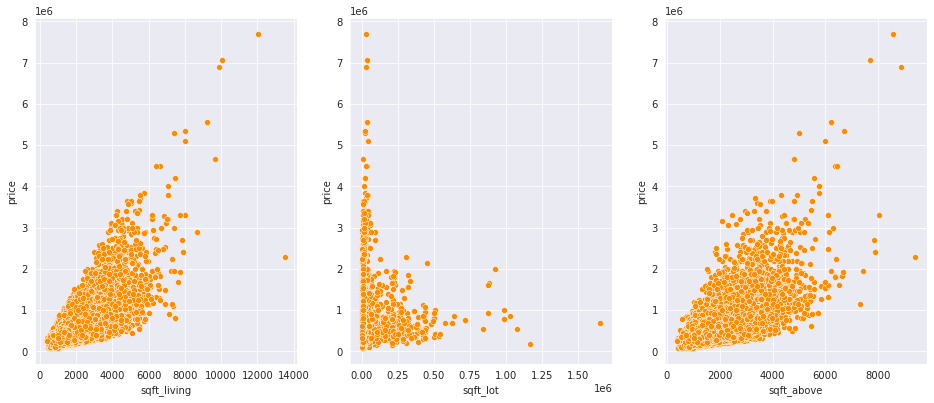

In [192]:
#A scatter plot of price and continous varibales
plt.figure(figsize = (16,14))
plot(continuous)

#### Bar Charts to show price and categorical variables

<Figure size 1152x1008 with 0 Axes>

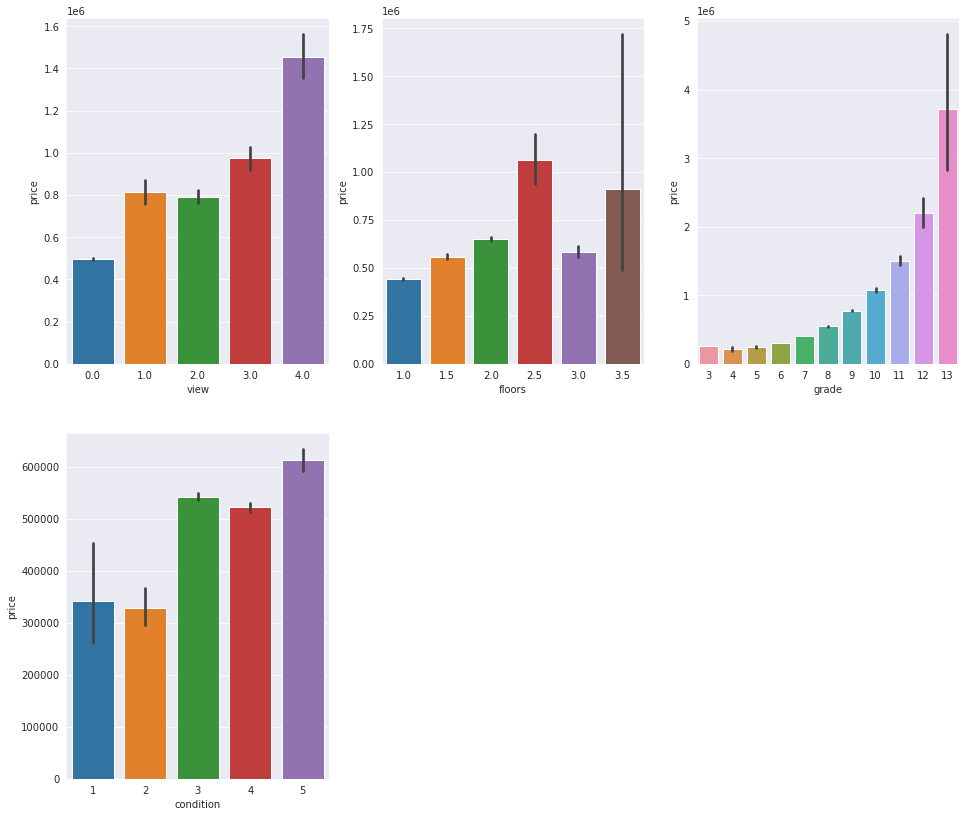

In [195]:
#Plot bar graphs to show the data
plt.figure(figsize = (16,14))
# call the function 
plot(categorical_bi)

<AxesSubplot:xlabel='month_sold', ylabel='count'>

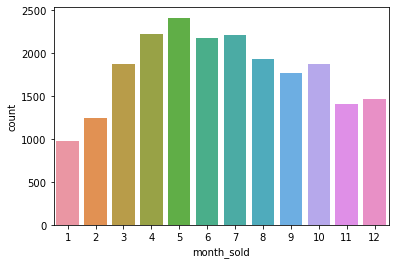

In [ ]:
# A plot to show the months that have most houses sold
sns.countplot(df['month_sold'])

##### The data shows there is no specific month where people shop for houses.Houses are sold anytime but mostly mid-year. Therefore there is no significantly better month to buy or sell a house

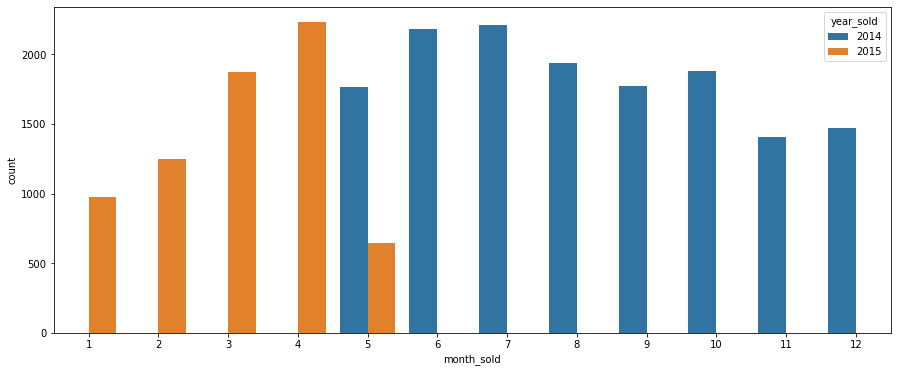

In [ ]:
#Plot of sold house per month in each year
data = df[['year_sold','month_sold']]
fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.countplot(x='month_sold',hue = 'year_sold', data=data)


##### In this graph we see that in the year 2014, house sales increased per month as from the collected data from May till December. <br>
##### In the next year 2015, the house sales continued from January till may increasingly.

### Convert categorical features to numeric data

To answer the business question of whether renovations increase the price of the house, we check the collinearity we see it has a low collinearlity. In order to determine the effective collinearlity of renovations and price we have to convert the column `renovations` from `categorical` to `numeric`

#### Binary category

Since `renovations` can be categorised into either it has been renovated or it has not been renovated. We can use binary encoders i.e `1` to represent it has been renovated and `0` to represent it has not been viewed 

In [ ]:
df['yr_renovated'].unique()

array([   0., 1991., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968.,
       2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [ ]:
# A function to convert yr_renovated to binary
def year_renovated(x):
    if x > 0:
        return 1
    else:
        return 0 
        
    return x

In [ ]:
#Apply the function to the column
df['yr_renovated'].apply(year_renovated)

0        0
1        1
2        0
3        0
4        0
        ..
21592    0
21593    0
21594    0
21595    0
21596    0
Name: yr_renovated, Length: 21597, dtype: int64

In [ ]:
#create a column to show renovated
df['renovated'] = df['yr_renovated'].apply(year_renovated)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold,renovated
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1955,0.0,98178,47.5112,-122.257,1340,5650,2014,10,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,12,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,1933,0.0,98028,47.7379,-122.233,2720,8062,2015,2,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1965,0.0,98136,47.5208,-122.393,1360,5000,2014,12,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1987,0.0,98074,47.6168,-122.045,1800,7503,2015,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,2009,0.0,98103,47.6993,-122.346,1530,1509,2014,5,0
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,2014,0.0,98146,47.5107,-122.362,1830,7200,2015,2,0
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,2009,0.0,98144,47.5944,-122.299,1020,2007,2014,6,0
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,...,2004,0.0,98027,47.5345,-122.069,1410,1287,2015,1,0


In [ ]:
df['view'].value_counts()

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [224]:
#Remove the outliers
# define a function called outliers which returns a list of index of outliers
# IQR =Q3 -Q1
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound)]
    
    return ls


In [226]:
#create an empty list to store the output indices from multiple columns 
index_list =[]
for element in ['bedrooms']:
    index_list.extend(outliers(df,element))

index_list

[154,
 209,
 232,
 239,
 264,
 331,
 350,
 465,
 486,
 527,
 556,
 558,
 648,
 717,
 718,
 784,
 833,
 860,
 902,
 1065,
 1134,
 1160,
 1161,
 1193,
 1226,
 1239,
 1264,
 1304,
 1313,
 1376,
 1387,
 1411,
 1455,
 1476,
 1501,
 1533,
 1537,
 1593,
 1627,
 1651,
 1658,
 1672,
 1710,
 1716,
 1732,
 1750,
 1880,
 1929,
 1954,
 1969,
 1973,
 1984,
 2006,
 2024,
 2029,
 2068,
 2072,
 2154,
 2304,
 2308,
 2343,
 2364,
 2380,
 2409,
 2494,
 2495,
 2514,
 2565,
 2627,
 2651,
 2666,
 2669,
 2685,
 2707,
 2725,
 2823,
 2850,
 2904,
 2925,
 2928,
 2971,
 3040,
 3077,
 3106,
 3149,
 3220,
 3232,
 3250,
 3282,
 3300,
 3335,
 3380,
 3485,
 3519,
 3536,
 3537,
 3578,
 3598,
 3609,
 3644,
 3657,
 3716,
 3717,
 3721,
 3741,
 3772,
 3801,
 3833,
 3870,
 3921,
 3932,
 3980,
 3983,
 4020,
 4031,
 4063,
 4085,
 4092,
 4103,
 4142,
 4193,
 4231,
 4236,
 4251,
 4340,
 4386,
 4406,
 4442,
 4577,
 4594,
 4635,
 4647,
 4650,
 4653,
 4697,
 4713,
 4756,
 4828,
 4863,
 4885,
 5044,
 5130,
 5133,
 5155,
 5160,
 516

In [227]:
# define a function called "remove" which returns a cleaned dataframe
def remove (df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df


In [228]:
# apply the function to remove outliers in price column
clean_kc_df =remove(df, index_list)
#check the shape of the data set
clean_kc_df .shape

(21067, 23)

In [229]:
# the percentage of data removed 
((len(df )-len(clean_kc_df))/len(clean_kc_df))*100

2.515782978117435

## Modelling

##### List the columns that we will use for the modelling to answer the business question

In [137]:
#List the columns needed 
model_df = clean_kc_df.loc[:, (["price", "bedrooms","bathrooms", "sqft_lot",
                  "floors","sqft_living15", "sqft_lot15",
                  "lat","long","sqft_basement","sqft_above"
                  ])]
model_df

,price,bedrooms,bathrooms,sqft_lot,floors,sqft_living15,sqft_lot15,lat,long,sqft_basement,sqft_above
0,221900.0,3,1.00,5650,1.0,1340,5650,47.5112,-122.257,0.0,1180
1,538000.0,3,2.25,7242,2.0,1690,7639,47.7210,-122.319,400.0,2170
2,180000.0,2,1.00,10000,1.0,2720,8062,47.7379,-122.233,0.0,770
3,604000.0,4,3.00,5000,1.0,1360,5000,47.5208,-122.393,910.0,1050
4,510000.0,3,2.00,8080,1.0,1800,7503,47.6168,-122.045,0.0,1680
...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1131,3.0,1530,1509,47.6993,-122.346,0.0,1530
21593,400000.0,4,2.50,5813,2.0,1830,7200,47.5107,-122.362,0.0,2310
21594,402101.0,2,0.75,1350,2.0,1020,2007,47.5944,-122.299,0.0,1020
21595,400000.0,3,2.50,2388,2.0,1410,1287,47.5345,-122.069,0.0,1600


##### Normalization

In [139]:
#set the features of the model
x = model_df.drop(columns = ["price"])
y = model_df["price"]


In [140]:
#split the data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 50)

In [144]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

##### Train the model

In [145]:
from sklearn.linear_model import LinearRegression
OLS = LinearRegression()
OLS.fit(x_train,y_train)

LinearRegression()

In [143]:
#display the intercept and coefficients of the OLS model
print("Intercept is" + str(OLS.intercept_))
print('the set of coefficients are' + str(OLS.coef_))
print("The R-squared values is" + str(OLS.score(x_train,y_train)))

Intercept is477477.6252201693
the set of coefficients are[-12631.70156681   9859.96433177  13072.6142854    7880.77601289
  52549.78203402  -3874.42849389  85091.26250894 -24194.63459635
  47732.35321268  87457.5129496 ]
The R-squared values is0.6040509900592951


In [146]:
#predicting with OLS
y_pred = OLS.predict(x_test)
performance = pd.DataFrame({'PREDICTIONS' : y_pred, 'ACTUAL VALUES':y_test})
performance['error'] = performance['ACTUAL VALUES'] - performance['PREDICTIONS']
performance

,PREDICTIONS,ACTUAL VALUES,error
9161,559732.793063,569999.0,10266.206937
4627,683026.986644,641000.0,-42026.986644
1536,428765.535123,420000.0,-8765.535123
18841,280211.991288,269500.0,-10711.991288
13492,459903.837837,585000.0,125096.162163
...,...,...,...
2877,505912.981287,334000.0,-171912.981287
3332,293098.721001,400000.0,106901.278999
16154,547449.921345,623000.0,75550.078655
99,467169.551510,437500.0,-29669.551510


In [147]:
# preparing the data for plotting
performance.reset_index(drop =True, inplace =True)
performance.reset_index( inplace =True)
performance.head()

,index,PREDICTIONS,ACTUAL VALUES,error
0,0,559732.793063,569999.0,10266.206937
1,1,683026.986644,641000.0,-42026.986644
2,2,428765.535123,420000.0,-8765.535123
3,3,280211.991288,269500.0,-10711.991288
4,4,459903.837837,585000.0,125096.162163


In [148]:
#mean absolute error
performance['error'].abs().mean()
#mean_absolute_error(y_test,pred)

99205.7244796029

<function matplotlib.pyplot.show(close=None, block=None)>

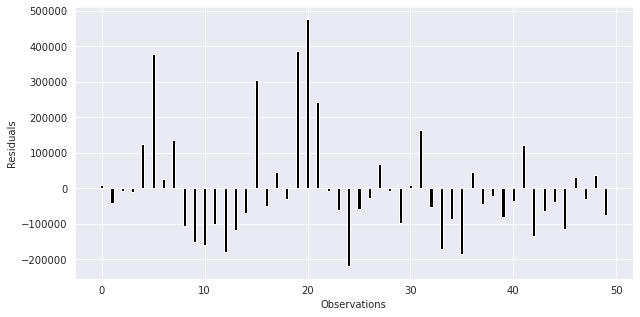

In [149]:
#plot the residuals

fig = plt.figure(figsize =(10,5))
plt.bar('index','error', data = performance[:50], color ='black', width=0.3)
plt.xlabel("Observations")
plt.ylabel('Residuals')
plt.show

In [150]:
# display the intercept and coefficients of the OLS model
import statsmodels.api as sm
x_train=sm.add_constant(x_train)
nicerOLS=sm.OLS(y_train, x_train).fit()
nicerOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     2337.
Date:                Sun, 03 Jul 2022   Prob (F-statistic):               0.00
Time:                        22:11:14   Log-Likelihood:            -2.0242e+05
No. Observations:               15329   AIC:                         4.049e+05
Df Residuals:                   15318   BIC:                         4.049e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.775e+05   1061.643    449.753      0.000    4.75e+05     4.8e+05
x1         -1.263e+04   1366.964     -9.241      0.000   -1.53e+04   -9952.289
x2          9859.9643   1703.754      5.787      0.000    6520.404    1.32e+04
x3          1.307e+04   1537.900      8.500      0.000    1.01e+04    1.61e+04
x4          7880.7760   1450.148      5.434      0.000    5038.313    1.07e+04
x5          5.255e+04   1672.889     31.413      0.000    4.93e+04    5.58e+04
x6         -3874.4285   1553.113     -2.495      0.013   -6918.714    -830.143
x7          8.509e+04   1088.187     78.195      0.000     8.3e+04    8.72e+04
x8         -2.419e+04   1222.389    -19.793      0.000   -2.66e+04   -2.18e+04
x9          4.773e+04   1443.481     33.068      0.000    4.49e+04    5.06e+04
x10         8.746e+04   2147.847     40.719      0.000    8.32e+04    9.17e+04
==============================================================================
Omnibus:                     1265.522   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1853.815
Skew:                           0.663   Prob(JB):                         0.00
Kurtosis:                       4.070   Cond. No.                         4.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""